Pytorch 

In [21]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import torch
print(torch.__version__)

2.5.1+cpu


Количество классов: 1000


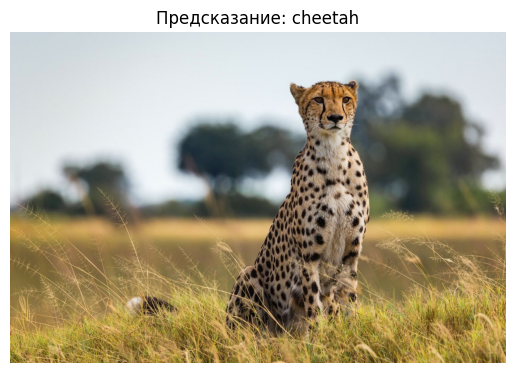

In [31]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt
import requests

# Загружаем модель ResNet-18 с предобученными весами
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()  # Переводим модель в режим оценки

# Функция для предобработки изображения
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменение размера изображения
        transforms.ToTensor(),         # Преобразование в тензор
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
    ])
    img_tensor = transform(img).unsqueeze(0)  # Добавляем размер батча
    return img, img_tensor

# Функция для предсказания класса изображения
def predict(image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)  # Прямой проход модели
        _, predicted_idx = torch.max(outputs, 1)  # Индекс класса с максимальным значением
        return predicted_idx.item()

# Функция для загрузки стандартного списка классов ImageNet
def load_imagenet_classes():
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    response = requests.get(url)
    return response.text.strip().split("\n")

# Путь к изображению (измените путь на путь к вашему изображению)
image_path = "scale_1200.jpg"  # Путь к изображению ирландской лошади

try:
    original_image, image_tensor = preprocess_image(image_path)
    class_names = load_imagenet_classes()  # Загружаем 1000 классов ImageNet

    # Проверка количества классов
    print(f"Количество классов: {len(class_names)}")

    predicted_idx = predict(image_tensor)  # Получаем индекс предсказанного класса

    # Проверка, что индекс находится в пределах допустимого диапазона
    if predicted_idx < len(class_names):
        predicted_class_en = class_names[predicted_idx]
    else:
        print(f"Индекс {predicted_idx} выходит за пределы списка классов.")
        predicted_class_en = "Неизвестный класс"

    # Вывод результата
    plt.imshow(original_image)
    plt.title(f"Предсказание: {predicted_class_en}")
    plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"Файл {image_path} не найден. Убедитесь, что путь указан правильно.")
